# Title : Plant Nutrition Prediction

### Deskripsi :

Aria Agriculture adalah perusahaan yang berkaitan dengan semua teknologi pertanian bertujuan untuk meningkatkan perusahaan perkebunan dan kehutanan memiliki kualitas dan kuantitas hasil panen yang lebih baik. Projek ini akan membuat model machine learning yang bisa membantu perusahaan Aria untuk dapat memprediksi nutrisi tanaman.

# Introduction

Nama saya Vincent Timothy Djaja dari angkatan ke-17 Remote Full Time Data Science Hacktiv8. Saya lulusan bisnis manajemen Universitas Prasetiya Mulya yang memiliki pengalaman kerja sebagai finance accounting consultant. 

Pada projek ini saya mendapatkan performa model yang kurang bagus, menurut tafsiran saya hal ini dikarenakan dataset nya kurang banyak sehingga saya melakukan oversampling data pada model improvement section dan didapat hasil yang lebih baik secara signifikan.

# External Link

https://huggingface.co/spaces/Vincentim27/Talent_Fair_2023_Vincent_TD

# Working Area

## i. Import Libraries

Pertama-tama mari lakukan import library yang digunakan pada projek ini.

In [1]:
# Import Library
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt # Visualisasi 1
import seaborn as sns # Visualisasi 2
import phik # Correlation matrix
from phik import resources, report # Correlation matrix
from sklearn.model_selection import train_test_split # Splitting train test set
from sklearn.decomposition import PCA # Dimension Reduction
from sklearn.preprocessing import PowerTransformer # Scalling
from sklearn.linear_model import LinearRegression # Model 1
from sklearn import neighbors # Model 2
from sklearn.svm import SVR # Model 3
from sklearn.tree import DecisionTreeRegressor # Model 4
from sklearn.ensemble import RandomForestRegressor # Model 5
from sklearn.ensemble import AdaBoostRegressor # Model 6
from sklearn.metrics import mean_absolute_error # Model Evaluation 1
from sklearn.metrics import r2_score # Model Evaluation 2
import pickle # Model Saving
import warnings
warnings.filterwarnings("ignore")

## ii. Data Loading

Selanjutnya mari import dataset yang digunakan, menduplikat data originalnya, dan menunjukan 5 data teratas.

In [2]:
# Import dataset
df_ori = pd.read_excel('aria_data.xlsx')

# Duplicate dataset
df = df_ori.copy()

# Df head
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


## iii. Exploratory Data Analysis

Sekarang mari lihat informasi mengenai dataset ini.

In [3]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Dapat dilihat dari dataset di atas terdapat 160 jumlah baris, 10 jumlah kolom dengan 1 kolom categorical dan 9 kolom numerical. Tidak ada missing value pada dataset ini. Sekarang mari lihat target dari dataset kali ini dengan `.unique()`.

In [4]:
# Target check
df.target.unique()

array([4.63, 5.  , 4.91, 4.77, 4.89, 4.88, 4.55, 4.74, 4.72, 4.69, 4.79,
       4.85, 4.66, 4.46, 4.65, 5.26, 4.78, 4.67, 5.09, 4.86, 5.07, 4.44,
       4.94, 4.92, 4.57, 4.7 , 5.02, 4.62, 4.36, 4.84, 4.4 , 4.83, 4.48,
       4.5 , 4.81, 4.6 , 4.68, 4.45, 4.82, 4.59, 4.37, 5.04, 4.53, 4.38,
       4.71, 4.56, 4.87, 4.76, 4.96, 4.64, 4.8 , 4.93, 5.03, 5.11, 4.95,
       4.98, 5.05, 4.9 , 5.01, 5.08, 4.14, 4.2 , 4.58, 4.52, 4.34, 4.54,
       4.97, 4.73, 4.13, 4.47, 4.35, 4.43])

Dari hasil di atas jelas bahwa target nya adalah angka sehingga untuk modellingnya dapat menggunakan regresi. Selanjutnya mari periksa kolom sample type.

lab 1    100
lab 2     60
Name: sample_type, dtype: int64


<AxesSubplot: ylabel='sample_type'>

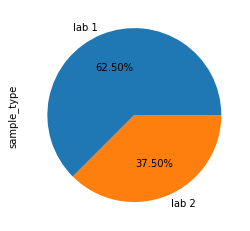

In [5]:
# Sample type check
print(df.sample_type.value_counts())
df.sample_type.value_counts().plot(kind='pie',autopct='%.2f%%')

Ternyata 'sample_type' ini berisi Lab 1 dan Lab 2 artinya informasi mengenai v1-v8 didapat dari 2 laboratorium yang berbeda. Pada dataset kali ini ada 100 data (62.5%) yang berasal dari Lab 1 dan 60 data (37.5%) dari Lab 2. Sekarang mari lihat deskriptif statistik dari numerical kolom nya.

In [6]:
# Check central tendency
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


Dari table ini dapat dilihat range setiap feature nya cukup jauh-jauh, dan juga v8 punya nilai yang tinggi dibandingkan feature lainnya. Dari mean dan median nya juga dapat dilihat kebanyakan bedanya cukup jauh, ini menandakan bahwa kemungkinan feature-feature ini adalah `skew distribution`. Standar deviasinya juga sangat bervariasi ada yang 51, ada yang mencapai 335.

In [7]:
# Check duplicate data
print('Terdapat',df.duplicated().sum(), 'data terduplikat.')

Terdapat 0 data terduplikat.


Terakhir memeriksa apakah ada data yang terduplikat atau tidak, dan hasilnya tidak ada data duplikat pada dataset ini. Sekarang mari lakukan preprocessing data.

## iv. Feature Engineering

Pertama-tama mari pisahkan dulu target dan feature pada project kali ini. Target kali ini adalah 'target' simpan ke dalam variable y, dan features nya disimpan ke variable X.

In [8]:
# Split between target and features
X = df.drop(['target'], axis=1)
y = df['target']
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


Selanjutnya mari lakukan manual encoding untuk feature 'sample_type'. Ganti 'lab 1' jadi 1 dan 'lab 2' jadi 2.

In [9]:
# Change lab 1 and lab 2
X['sample_type'].replace(['lab 1','lab 2'],[1,2],inplace=True)
X.head(1)

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,260.6,199.0,391.333333,371.733333,466.8,273.133333,742.066667,4047.733333,1


Setelah itu mari pisahkan train set dengan test-set nya. Berhubung jumlah barisnya 160, jadi saya akan perbanyak porsi train-setnya dengan mensetting test_size=0.05, 95% data untuk train-set dan 5% untuk test-set. Sedangkan random_state=7 hanya untuk mengacak datasetnya agar terbagi merata.

In [10]:
# Split into X_train X_test y_train y_test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=7)
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

X_train.head()

Train Size :  (152, 9)
Test Size  :  (8, 9)


,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
66,298.437500,201.562500,419.062500,396.750000,467.875000,239.750000,801.562500,4495.437500,1
115,552.875000,211.812500,574.812500,366.375000,465.812500,201.687500,651.000000,4428.312500,2
24,243.200000,196.666667,393.600000,356.333333,400.000000,213.000000,719.200000,4689.333333,1
156,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,2
13,280.866667,197.400000,374.666667,339.266667,407.866667,212.333333,716.266667,4624.000000,1


Table di atas menunjukan 5 data teratas pada X_train. Lalu mari gabungkan y_train dengan X_train untuk melihat korelasi antar features dengan targetnya.

In [11]:
# Concat X_train and y_train to feature selection
fs_df = pd.concat([y_train,X_train], axis=1)
fs_df 

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
66,4.48,298.437500,201.562500,419.062500,396.750000,467.875000,239.750000,801.562500,4495.437500,1
115,4.98,552.875000,211.812500,574.812500,366.375000,465.812500,201.687500,651.000000,4428.312500,2
24,4.44,243.200000,196.666667,393.600000,356.333333,400.000000,213.000000,719.200000,4689.333333,1
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,2
13,4.66,280.866667,197.400000,374.666667,339.266667,407.866667,212.333333,716.266667,4624.000000,1
...,...,...,...,...,...,...,...,...,...,...
92,4.64,331.312500,252.312500,429.000000,408.875000,467.562500,256.750000,779.062500,4971.437500,1
103,4.72,541.875000,209.500000,589.250000,374.687500,490.500000,216.875000,638.750000,4467.875000,2
151,4.62,570.562500,344.062500,629.062500,487.437500,672.937500,323.750000,708.750000,3889.375000,2
67,4.63,261.866667,209.400000,394.933333,364.733333,421.400000,225.466667,738.866667,4526.800000,1


Project ini menggunakan `phik_matrix` correlation dalam memeriksa korelasi antar features dengan targetnya.

In [12]:
# Check correlation using phik
fs_df.phik_matrix()

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'sample_type']


,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
target,1.000000,0.440693,0.369678,0.400367,0.345332,0.368400,0.468590,0.352622,0.463291,0.394548
v1,0.440693,1.000000,0.911207,0.857893,0.778551,0.783410,0.785394,0.552636,0.676861,1.000000
v2,0.369678,0.911207,1.000000,0.823306,0.862969,0.801383,0.842916,0.525647,0.710067,0.841101
v3,0.400367,0.857893,0.823306,1.000000,0.828896,0.805094,0.793916,0.649402,0.631164,1.000000
v4,0.345332,0.778551,0.862969,0.828896,1.000000,0.869453,0.924985,0.729270,0.795975,0.809066
v5,0.368400,0.783410,0.801383,0.805094,0.869453,1.000000,0.827199,0.765379,0.722594,0.725912
v6,0.468590,0.785394,0.842916,0.793916,0.924985,0.827199,1.000000,0.759691,0.776700,0.789990
v7,0.352622,0.552636,0.525647,0.649402,0.729270,0.765379,0.759691,1.000000,0.671582,0.217712
v8,0.463291,0.676861,0.710067,0.631164,0.795975,0.722594,0.776700,0.671582,1.000000,0.772241
sample_type,0.394548,1.000000,0.841101,1.000000,0.809066,0.725912,0.789990,0.217712,0.772241,1.000000


Dapat dilihat dari phik_correlation di atas bahwa terdapat korelasi tinggi antara feature yang satu dengan feature yang lainnya seperti `korelasi v1 dengan v2 = 0.91`, `korelasi v1 dengan v3 = 0.85`, dan `v4 dengan v6 = 0.92`. Sehingga saya akan melakukan reduksi dimensi dengan `Principal Component Analysis(PCA)`, namun sebelumnya dilakukan scaling - encoding untuk X_train dan X_test nya terlebih dahulu. Berhubung beberapa alogaritma model yang digunakan sensitif terhadap outliers, scaling method nya menggunakan `PowerTransformer` karena saya ingin sekaligus membuang outliers pada features (jika ada). 

In [13]:
# Feature Scaling using PowerTransformer
scaler = PowerTransformer()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(152, 9)

Sekarang mari reduksi dimensi menggunakan PCA. Pertama-tama mari cek terlebih dahulu n_components yang sebaiknya digunakan. Cumulative sum dengan pca.explained_variance_ratio >= 95%.

In [14]:
# Dimension reduction elbow check
pca = PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

Selanjutnya mari visualisasikannya. X adalah Dimesions dan Y Explained Variance. Di sini saya mencari elbow/siku di mana penambahan dimensi sudah kurang berpengaruh secara signifikan.

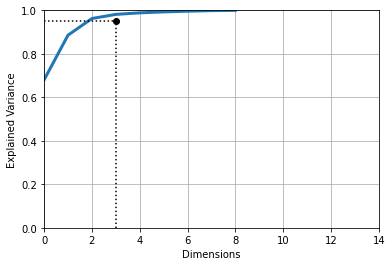

In [15]:
# Visualization
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Dari grafik di atas dapat dilihat bahwa elbow nya ada di angka 3, artinya n_components nya cukup 3 saja untuk mewakili 9 features dari original datasetnya. Mari lakukan reduksi dimensinya!

In [16]:
# Dimension reduction using PCA
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_reduced_train = pca.transform(X_train_scaled)
X_reduced_test = pca.transform(X_test_scaled)

Selesai, sekarang mari masuk ke tahap pendefinisian model.

## v. Model Definition

Pada project kali ini targetnya adalah memprediksi angka/regresi sehingga digunakan metrics r2score dan mean absolute error. 

Berhubung regresi, saya menggunakan 6 alogaritma model untuk dibandingkan r2score nya dan diambil hasil terbaik, yaitu: 
- Model pertama Linear Regression
- Model kedua KNN
- Model ketiga SVM Regression
- Model keempat Decisiontree Regression
- Model kelima Random Forest Regression
- Model keenam Adaboost



In [17]:
# Training using Linear Regression (1)
model_lin = LinearRegression()

# Training using KNN (2)
model_knn = neighbors.KNeighborsRegressor()

# Training using SVM (3)
model_svm = SVR(kernel="poly", degree=3,C=1000,epsilon=0.01)

# Training using Decisiontree (4)
model_dec = DecisionTreeRegressor(max_depth=7,random_state=27)

# Training using RandomForest (5)
model_ran = RandomForestRegressor(max_depth=7, random_state=27)

# Training using adaboost (6)
model_ada = AdaBoostRegressor(random_state=27, n_estimators=27)

Selanjutnya, let's train the model!

## vi. Model Training

In [18]:
# Train the Model 1
model_lin.fit(X_reduced_train, y_train)

LinearRegression()

In [19]:
# Train the Model 2
model_knn.fit(X_reduced_train, y_train)

KNeighborsRegressor()

In [20]:
# Train the Model 3
model_svm.fit(X_reduced_train, y_train)

SVR(C=1000, epsilon=0.01, kernel='poly')

In [21]:
# Train the Model 4
model_dec.fit(X_reduced_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=27)

In [22]:
# Train the Model 5
model_ran.fit(X_reduced_train, y_train)

RandomForestRegressor(max_depth=7, random_state=27)

In [23]:
# Train the Model 6
model_ada.fit(X_reduced_train, y_train)

AdaBoostRegressor(n_estimators=27, random_state=27)

## vii. Model Evaluation

Setelah model training, sekarang mari lihat performa model nya. Pertama mari lakukan `.preidct()` dulu untuk seluruh model.

In [24]:
# Predict Train-Set and Test-Set 1
y_pred_train_lin = model_lin.predict(X_reduced_train)
y_pred_test_lin = model_lin.predict(X_reduced_test)

# Predict Train-Set and Test-Set 2
y_pred_train_knn = model_knn.predict(X_reduced_train)
y_pred_test_knn = model_knn.predict(X_reduced_test)

# Predict Train-Set and Test-Set 3
y_pred_train_svm = model_svm.predict(X_reduced_train)
y_pred_test_svm = model_svm.predict(X_reduced_test)

# Predict Train-Set and Test-Set 4
y_pred_train_dec = model_dec.predict(X_reduced_train)
y_pred_test_dec = model_dec.predict(X_reduced_test)

# Predict Train-Set and Test-Set 5
y_pred_train_ran = model_ran.predict(X_reduced_train)
y_pred_test_ran = model_ran.predict(X_reduced_test)

# Predict Train-Set and Test-Set 6
y_pred_train_ada = model_ada.predict(X_reduced_train)
y_pred_test_ada = model_ada.predict(X_reduced_test)

Sekarang mari lihat hasil mean absolute error dengan r2scorenya untuk masing-masing model.

In [25]:
# Model Evaluation using MAE & r2_score

#Linear Regression evaluation
print('Linear Regression model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_lin)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_lin))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_lin))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_lin))
print('')

# Knn evaluation
print('KNN model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_knn)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_knn))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_knn))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_knn))
print('')

# SVM evaluation
print('SVM model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_svm)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_svm))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_svm))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_svm))
print('')

# Decision tree evaluation
print('Decision tree model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_dec)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_dec))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_dec))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_dec))
print('')

# Random Forest evaluation
print('Random forest model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_ran)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_ran))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_ran))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_ran))
print('')

# Ada booster evaluation 
print('Ada Booster model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_ada)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_ada))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_ada))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_ada))

Linear Regression model:
Error - Train Set :  0.1520086315817892
Error - Test Set  :  0.06297794319189431
----------------------------------------
r2Score-Train Set :  0.27780952974383444
r2Score-Test Set :  0.6163943391249611

KNN model:
Error - Train Set :  0.13223684210526304
Error - Test Set  :  0.1060000000000001
----------------------------------------
r2Score-Train Set :  0.4415184091680645
r2Score-Test Set :  -0.13481967213115564

SVM model:
Error - Train Set :  0.141460910649011
Error - Test Set  :  0.06296835512202514
----------------------------------------
r2Score-Train Set :  0.2937452651778999
r2Score-Test Set :  0.5668545014521325

Decision tree model:
Error - Train Set :  0.04427469314311417
Error - Test Set  :  0.0884455128205126
----------------------------------------
r2Score-Train Set :  0.8903889427273253
r2Score-Test Set :  0.146788270227738

Random forest model:
Error - Train Set :  0.07604788720264184
Error - Test Set  :  0.07146132477891576
--------------------

Jika dilihat dari hasil di atas, saya pilih Random Forest model karena memiliki train score di atas 80% dan test score nya di atas rata-rata model lain. Nilai MAE nya juga rendah, di bawah 0.1. Namun tetap model ini masih tergolong underfit. Sekarang mari lakukan model improvement! 

## viii. Model Improvement

Dalam melakukan model improvement saya mencoba melakukan oversampling kepada data agar data bisa belajar lebih banyak dan memiliki pola yang baik. Saya mengkali 5 kan original dataset dan menggabungkan nya menjadi df_imp (data improve).

In [26]:
# Make a dplicat data
df1 = df_ori.copy()
df2 = df_ori.copy()
df3 = df_ori.copy()
df4 = df_ori.copy()
df5 = df_ori.copy()

# Concat
df_imp = pd.concat([df1,df2,df3,df4,df5])

Setelah itu saya melakukan sama persis dengan proses feature enigneering di atas seperti langkah-langkah berikut ini.

In [27]:
# Split between target and features

X = df_imp.drop(['target'], axis=1)
y = df_imp['target']
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [28]:
# Change lab 1 and lab 2
X['sample_type'].replace(['lab 1','lab 2'],[1,2],inplace=True)
X.head(1)

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,260.6,199.0,391.333333,371.733333,466.8,273.133333,742.066667,4047.733333,1


In [29]:
# Split into X_train X_test y_train y_test using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

X_train.head()

Train Size :  (600, 9)
Test Size  :  (200, 9)


,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
13,280.866667,197.4000,374.666667,339.266667,407.866667,212.333333,716.266667,4624.000000,1
133,620.875000,367.0000,659.000000,480.000000,668.250000,364.062500,752.187500,3772.875000,2
55,272.333333,205.0000,383.266667,366.666667,414.000000,222.333333,711.333333,4701.466667,1
65,274.687500,194.0625,389.500000,358.500000,426.312500,226.250000,732.812500,4632.687500,1
51,264.312500,201.5000,389.125000,360.312500,432.312500,232.562500,737.500000,4566.062500,1


In [30]:
# Feature Scaling using PowerTransformer

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(600, 9)

In [31]:
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_reduced_train = pca.transform(X_train_scaled)
X_reduced_test = pca.transform(X_test_scaled)

Lalu saya tetap melakukan training untuk ke 6 model di atas untuk melihat best modelnya.

In [32]:
# Train the Model 1
model_lin.fit(X_reduced_train, y_train)

LinearRegression()

In [33]:
# Train the Model 2
model_knn.fit(X_reduced_train, y_train)

KNeighborsRegressor()

In [34]:
# Train the Model 3
model_svm.fit(X_reduced_train, y_train)

SVR(C=1000, epsilon=0.01, kernel='poly')

In [35]:
# Train the Model 4
model_dec.fit(X_reduced_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=27)

In [36]:
# Train the Model 5
model_ran.fit(X_reduced_train, y_train)

RandomForestRegressor(max_depth=7, random_state=27)

In [37]:
# Train the Model 6
model_ada.fit(X_reduced_train, y_train)

AdaBoostRegressor(n_estimators=27, random_state=27)

In [38]:
# Predict Train-Set and Test-Set 1
y_pred_train_lin = model_lin.predict(X_reduced_train)
y_pred_test_lin = model_lin.predict(X_reduced_test)

# Predict Train-Set and Test-Set 2
y_pred_train_knn = model_knn.predict(X_reduced_train)
y_pred_test_knn = model_knn.predict(X_reduced_test)

# Predict Train-Set and Test-Set 3
y_pred_train_svm = model_svm.predict(X_reduced_train)
y_pred_test_svm = model_svm.predict(X_reduced_test)

# Predict Train-Set and Test-Set 4
y_pred_train_dec = model_dec.predict(X_reduced_train)
y_pred_test_dec = model_dec.predict(X_reduced_test)

# Predict Train-Set and Test-Set 5
y_pred_train_ran = model_ran.predict(X_reduced_train)
y_pred_test_ran = model_ran.predict(X_reduced_test)

# Predict Train-Set and Test-Set 6
y_pred_train_ada = model_ada.predict(X_reduced_train)
y_pred_test_ada = model_ada.predict(X_reduced_test)

In [39]:
# Model Evaluation using MAE

#Linear Regression evaluation
print('Linear Regression model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_lin)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_lin))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_lin))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_lin))
print('')

# Knn evaluation
print('KNN model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_knn)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_knn))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_knn))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_knn))
print('')

# SVM evaluation
print('SVM model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_svm)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_svm))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_svm))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_svm))
print('')

# Decision tree evaluation
print('Decision tree model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_dec)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_dec))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_dec))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_dec))
print('')

# Random Forest evaluation
print('Random forest model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_ran)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_ran))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_ran))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_ran))
print('')

# Ada booster evaluation 
print('Ada Booster model:')
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train_ada)) 
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test_ada))
print('-'*40)
print('r2Score-Train Set : ',r2_score(y_train, y_pred_train_ada))
print('r2Score-Test Set : ',r2_score(y_test, y_pred_test_ada))

Linear Regression model:
Error - Train Set :  0.15246593886541798
Error - Test Set  :  0.1349493599881573
----------------------------------------
r2Score-Train Set :  0.2696340235059066
r2Score-Test Set :  0.3263196053899263

KNN model:
Error - Train Set :  0.04120999999999997
Error - Test Set  :  0.07301999999999992
----------------------------------------
r2Score-Train Set :  0.915036426753583
r2Score-Test Set :  0.7709048693030898

SVM model:
Error - Train Set :  0.14193555231421878
Error - Test Set  :  0.12673472250802914
----------------------------------------
r2Score-Train Set :  0.28690548456421006
r2Score-Test Set :  0.3188621690477135

Decision tree model:
Error - Train Set :  0.04548635636167901
Error - Test Set  :  0.05770684085627623
----------------------------------------
r2Score-Train Set :  0.8909792665696117
r2Score-Test Set :  0.819738856165042

Random forest model:
Error - Train Set :  0.043665255395440104
Error - Test Set  :  0.052969245555881866
-----------------

Dapat di lihat model yang paling bagus dan improve adalah Random Forest model, dari 81% train r2score nya menjadi 92%, dari 50% test r2score nya menjadi 87%, dengan model error (MAE) nya di bawah 0.1.

## ix. Model Saving for Inference Dataset

Setelah didapat hasil yang bagus, saya lakukan model saving untuk inference dataset.

In [40]:
# Save Files For The Best Model
with open('model_ran.pkl', 'wb') as file_1:
  pickle.dump(model_ran, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

# Conclusion

Pada projek kali ini, saya telah membuat sebuah machine learning model untuk membantu perusahaan Aria dalam melakukan prediksi nutrisi tanaman. Hal ini dapat membantu perusahaan dalam mencapai nutrisi yang efektif dan efisien sehingga para client merasa puas dan dapat berlangganan terus ke depannya.

 Sebelum masuk modelling dilakukan dulu exploratory data analysis dengan kesimpulan sebagai berikut:
 - Dataset kali ini terdapat 160 jumlah baris, 10 jumlah kolom dengan 1 kolom categorical dan 9 kolom numerical. Tidak ada missing value pada dataset ini.
 - Terdapat 100 data (62.5%) yang berasal dari Lab 1 dan 60 data (37.5%) dari Lab 2.
 - Range (max-min) dan perbandingan mean dengan median setiap feature nya cukup jauh-jauh, ini menandakan bahwa kemungkinan data numericalnya `skew distribution`.
 - Tidak ada data terduplikat pada dataset ini.

Pada tahap preprocessing data/feature engineering, dilakukan split features dengan target dan split train-set dengan test-set. Tidak lupa juga dilakukan pemeriksaan korelasi antara features dengan target. Didapat hasil korelasi antara features kuat sehingga saya melakukan reduksi dimensi menggunakan `PCA`. Namun sebelum itu dilakukan scaling dengan `PowerTransformer` agar hasil scaling sudah sekaligus membuang outlier dimana ini penting sebab beberapa model yang digunakan sensitif terhadap outliers. Lalu PCA nya menggunakan 3 n_components.

Target adalah memprediksi angka/regresi sehingga digunakan metrics r2score dan mean absolute error. Berhubung regresi, saya menggunakan 6 alogaritma model untuk dibandingkan r2score nya dan diambil hasil terbaik, yaitu `Linear Regression, KNN, SVM Regression, Decisiontree Regression, Random Forest Regression, dan Adaboost`.

Performa modelnya kurang memuaskan, kebanyakan `underfit` (di bawah 70%) dan gap antara train dengan test nya jauh-jauh (lebih dari 5%), hal ini saya tafsir disebabkan oleh jumlah data yang sedikit. Jadi untuk `meng-improve model` saya `oversampling` data dengan cara menduplikat data original 5x lipat, didapatkan model yang paling bagus dan improve signifikan adalah `Random Forest model`, dari `81% train r2score nya menjadi 92% dan dari 50% test r2score nya menjadi 87%, dengan model error (MAE) nya di bawah 0.1`.

Adapun Kelebihan dan Kelemahan Random Forest yaitu:
+ Kelebihannya, waktu runtime-nya yang cepat dan model juga mampu menangani data yang imbalance. 
- Kelemahannya, jika digunakan untuk regresi model tidak dapat memprediksi di luar jangkauan train-set nya.

Untuk improvement selanjutnya, dapat dilakukan sampling lagi untuk menambah jumlah original dataset. Lalu bisa juga dilakukan model parameter tuning seperti `gridsearchCV atau RandomizedCV` terhadap Random Forest atau model lainnya untuk meningkatkan r2score dan memperkecil mean absolute errornya.
